# TP 6 Réseaux de neurones - Multi classification et Propagation en arrière
Dans ce TP, nous aimerions entrainer un réseau de neurones pour la tâche de classification en utilisant l'algorithme d propagation en arrière (backpropagation).

L'ensemble de données que nous allons utiliser est le même que celui utilisé durant le TP1, i.e. les images de chiffres manuscrits.


# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import cv2 

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(5000, 401)

Dans ces données (data), les 400 premières colonnes representent les pixels de l'image (20x20), la dernière colonne represente la classe de l'image (chiffres de 0 à 9). (http://yann.lecun.com/exdb/mnist/)

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

In [4]:
print('X', X.shape ,' y ', y.shape)

X (5000, 401)  y  (5000, 1)


Visualisation aléatoire de quelques données

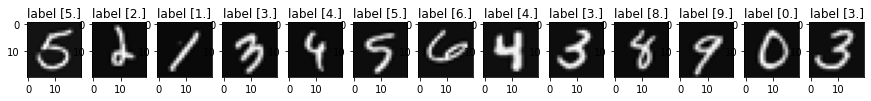

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

Transformer y de tel sorte à avoir un vecteur pour chaque exemple

Equivalent de tocategorical

In [6]:
YY=np.zeros((y.shape[0], int(np.max(y))+1))
YY.shape

(5000, 10)

In [7]:
for i in range (YY.shape[0]):
    YY[i,int(y[i])]=1

# Réseaux de neurones
Pour cette partie, nous choisissons une réseau simple:

- une couche d'entrée avec 400 noeuds (20 x 20 pixels) + le biais
- une couche cachée avec 25 noeuds
- une couche de sortie avec 10 noeuds (nombre de classes)

In [8]:
# poids de la couche 1
W1 = np.genfromtxt('W1.csv', delimiter=',', dtype=float)
W1.shape


(25, 401)

In [9]:
# poids de la couche 2
W2 = np.genfromtxt('W2.csv', delimiter=',', dtype=float)
W2.shape

(10, 26)

In [10]:
input_layer_size  = 400;  
hidden_layer_size = 25;   
num_labels = 10;

# Calcul du coût

# TODO  1 calcul du coût
**Tâche 1**: Modifier la fonction computeCost afin d'obtenir un coût avec régularisation

Rappelons que le coût avec régularisation est calculé comme suit:

$ J(\theta)= \frac{1}{m} \sum_{i=1}^m\sum_{k=1}^K \left[ -y_k^{(i)} \log (h_\theta(x^{(i)}) )_k - (1-y_k^{(i)}) \log (1-h_\theta(x^{(i)}) )_k \right] + \frac{\lambda}{2m} \left[ \sum_{j=1}^{25}\sum_{k=1}^{400} \left( \theta_{j,k}^{(1)} \right)^2 +   \sum_{j=1}^{10}\sum_{k=1}^{25} \left( \theta_{j,k}^{(2)} \right)^2 \right] $

In [11]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z));

In [12]:
def computeCost(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    a1=X; 

    z2= np.zeros((X.shape[0],hidden_layer_size))
    a2= np.zeros((X.shape[0],hidden_layer_size)) 

    intercept=np.ones((X.shape[0],1))
    z2=np.column_stack((intercept,np.matmul(a1,np.transpose(theta1))))
    a2=Sigmoid(z2)
    a2[:,0]=1

    z3= np.zeros((YY.shape[0],YY.shape[1]))    
    a3= np.zeros((YY.shape[0],YY.shape[1]))  

    z3=np.matmul(a2,np.transpose(theta2))
    a3=Sigmoid(z3)

    penalty = (np.sum(np.square(theta1[1:, :])) + np.sum(np.square(theta2[1:, :])))* lambda_/(2*y.shape[0])
    J=np.zeros((YY.shape[0],1))
    J= (1/y.shape[0])*(np.sum(np.sum((-YY*np.log(a3))-((1-YY)*np.log(1-a3))))) + penalty

    return J

# TODO  2 calcul du gradient
**Tâche 2**: Implémenter la fonction NNCostFunction afin de retourner:

- Le coût avec régularisation
- Le gardient du coût par rapport à chaqu'un des paramètres du réseau

Rappelons le gradient de la sigmoid:

$ sigmoid(z) =\sigma(z)= \frac{1}{1-e^{-z}}$

$ \sigma(z)^\prime = \sigma(z)(1-\sigma(z)) =a(1-a)$ tel que $a$ est l'activation d'une couche donnée

L'algorithme à implementer est comme suit:

Pour chaque exemple de l'ensemble d'apprentissage faire

Pour chaque noeud de la couche de sortie, calculer la dérivée (gradient):

$\delta_k^{(3)} = \left( a_k^{(3)}- y_k \right)  $

Pour chaque noeud de la couche caché calculer la dérivée (gradient):

$\delta^{(2)} =  \left(\Theta^{(2)}\right)^T \delta^{(3)} \quad .* \quad \sigma^\prime\left(z^{(2)} \right) $

Notons que l'opérateur $.*$ represente la multiplication élement par élement et non pas la multiplication matricielle

Le gradient de chaque noeud et de chaque couche sera finalement:

$\Delta^{(l)} =  \Delta^{(l)} + \delta^{(l)} * \left( a^{(l)} \right)^T $

Fin pour

Fin pour

Diviser le gradient cumulé par le nombre d'exemples:

$ \frac{\partial J(\Theta)} { \partial \Theta_{i,j)}^{(l)}} = \frac{1}{m} \Delta_{i,j)}^{(l)}$


In [13]:
def NNCostFunction(X, YY, theta1, theta2,hidden_layer_size, lambda_):
    theta1_grad = np.zeros((theta1.shape[0],theta1.shape[1]))
    theta2_grad = np.zeros((theta2.shape[0],theta2.shape[1]))
    
    intercept=np.ones((data.shape[0],1))
    a2 = np.column_stack((intercept, Sigmoid(X.dot(theta1.T))))
    a3 = Sigmoid(a2.dot(theta2.T))

    #t1 25,401
    #t2 10,26
    #a3,error3 5000,10
    #a2 5000,26
    #a1 5000,401
    #error2 5000,26
    error3 = a3 - YY 
    error2 = (error3.dot(theta2)* a2 * (1-a2))[:, 1:]
    
    penalty1 = theta1 * lambda_ 
    penalty1[0,:] = 0
    penalty2 = theta2 * lambda_
    penalty2[0,:] = 0
    
    delta3 = np.matmul(a2.T, error3) 
    delta2 = np.matmul(X.T, error2) 

    gradient3 = delta3/X.shape[0] + penalty2.T
    gradient2 = delta2/X.shape[0] + penalty1.T

    J = computeCost(X, YY, theta1, theta2, hidden_layer_size, lambda_)

    return J, gradient2 , gradient3



# TODO  3 entrainement du réseau
**Tâche 3**: Entrainer le réseau en utilisant la descente du gradient:
Ici il faudra reprendre l'algorithme de la descente du gradient afin de mettre à jour les paramètres du réseau


In [14]:
def gradientDescent(X, y, theta1, theta2, alpha, iterations, lambda_):
    for i in range(iterations):
        cost , g1, g2 = NNCostFunction(X, y, theta1, theta2, hidden_layer_size, lambda_)
        theta1 = theta1 - alpha * g1.T
        theta2 = theta2 - alpha * g2.T
        
    return cost, theta1, theta2

# TODO 4 : Régularisation
Mettre à jour le calcul du coût en ajoutant le terme de régularisation et comparer les résultats (avec et sans régularisation)

In [15]:
theta1 = np.zeros((W1.shape[0], W1.shape[1])) 
theta2 = np.zeros((W2.shape[0], W2.shape[1]))
thetareg1 = np.zeros((W1.shape[0], W1.shape[1])) 
thetareg2  = np.zeros((W2.shape[0], W2.shape[1]))

MaxIter= 1500
lambda_= 0
alpha = 1.6
cost , theta1, theta2 = gradientDescent(X, YY, theta1, theta2, alpha, MaxIter,lambda_)

lambda_ = 0.01
costreg , thetareg1, thetareg2 = gradientDescent(X, YY, thetareg1, thetareg2, alpha, MaxIter, lambda_)

print(f'cout sans regularisation: {cost}')
print(f'cout avec regularisation: {costreg}')


cout sans regularisation: 0.8549007952894905
cout avec regularisation: 1.5409244501695405


# TODO 5 : Prédiction

Appliquer une propagation en avant en utilisant les paramètres données pour prédir les classes de l'ensemble d'apprentissage.



In [16]:
def predict (W1, W2, X):
    
    # appliquer une propagation en avant
    # !--- n'oubliez pas d'appliquer la sigmoid à chaque couche afin d'avoir les probabilités ---!
    
    # prédire la classe en choisissant la probabilité maximale parmi les 10 noeuds de sortie

    a2 = Sigmoid(np.matmul(X , W1.T)) 
    intercept=np.ones((a2.shape[0],1))
    a2 = np.column_stack((intercept, a2))
    a3 = Sigmoid(np.matmul(a2, W2.T))

    y_pred = np.zeros((X.shape[0] ,1 ))
    for i in range(X.shape[0]):
        y_pred[i][0] = np.argmax(a3[i,:])

    return y_pred

In [17]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred_reg = predict(thetareg1,thetareg2,X)
precisionreg = np.mean(y==y_pred_reg)*100

y_pred = predict(theta1,theta2,X)
precision = np.mean(y==y_pred)*100

print(f'precision sans regularisation: {precision}')
print(f'precision avec regularisation: {precisionreg}')


precision sans regularisation: 87.14
precision avec regularisation: 80.30000000000001


# optionnel 1 : Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [18]:
from sklearn.neural_network import MLPClassifier
import random

In [19]:
clf = MLPClassifier(max_iter=10000, hidden_layer_sizes=(25,), random_state=1, activation = 'logistic')
clf.fit(X, y[:,0])
y_pred_sk = clf.predict(X)[:,None].astype(int)

print("Sklearn MLP Classifier:",np.mean(y==y_pred_sk)*100)
print("Our MLP Classifier: ",precision)


Sklearn MLP Classifier: 99.98
Our MLP Classifier:  87.14


# Optionnel 2 : Visualisation des poids
    
La visualisation de poids permet de voir quel partie du réseau est activé et pour quelle classe.
Il est possible de visulaiser les paramètres theta1 . 
Ceci peut se faire en utilisant un reshape de ces paramètres afin d'avoir 25 images de taille 20x20 (n'oubliez pas d'ignorer la premuère colonne, celle du biais)

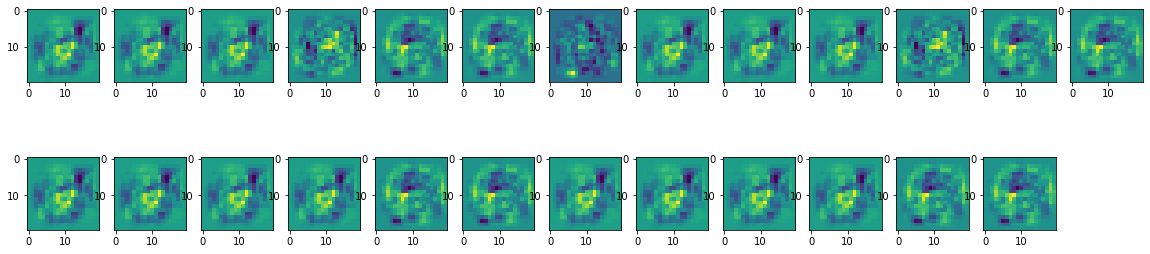

In [29]:
plt.figure(figsize=(20, 5))
for i in range(theta1.shape[0]):
    plt.subplot(2, 13, i + 1)
    plt.imshow(np.reshape(theta1[i][1:], (20, 20)))

# Optionnel 3 : Renforcement de l'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 29Avril 2022 à 22h


In [20]:
# bonne chance